In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
def check_data_quality(df):
    print("The shape:")
    print(df.shape)

    missing_values = df.isna().sum()
    if missing_values.sum() == 0:
        print("\nNo missing values found.")
    else:
        print("Columns with missing values:")
        print(missing_values[missing_values != 0])

    print("\nData types:")
    print(df.dtypes)
    
    print("\nUnique types:")
    print(df.nunique())

    print("\nSummary Statistics:")
    df.describe()

    df.hist(bins=50, figsize=(20,15))
    
    
    
def position_to_number(pos):
    if pos == 'PG':
        return 1
    elif (pos == 'PG-SG' or pos == 'SG-PG'):
        return 1.5
    elif (pos == 'SG' or pos == 'SG-PG-SF'):
        return 2
    elif (pos == 'SG-SF' or pos == 'SF-SG'):
        return 2.5
    elif pos == 'SF':
        return 3
    elif pos == 'PF-SF':
        return 3.5
    elif pos == 'PF':
        return 4
    elif pos == 'C-PF':
        return 4.5
    elif pos == 'C':
        return 5
    
    

def add_season_column(df):
    seasons = []
    current_season = 1980
    count = 0
    
    for index, row in df.iterrows():
        if row['Rk'] == 1 and count > 100:
            current_season += 1
            count = 0
        count += 1
        seasons.append(current_season)

    df['Season'] = seasons
    df.drop(df.columns[[19, 24, 29]], axis=1, inplace=True)
    df['Pos'] = df['Pos'].apply(position_to_number)
    del df["Rk"]
    df = df.dropna()
    return df


In [3]:
df = add_season_column(pd.read_csv("nba_player_1980-2022.csv"))
df

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,Kareem Abdul-Jabbar*,5.0,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
1,Tom Abernethy,4.0,25.0,GSW,67.0,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.0,-0.2,-1.2,0.2,1980
2,Alvan Adams,5.0,25.0,PHO,75.0,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.7,1.9,3.6,3.1,1980
3,Tiny Archibald*,1.0,31.0,BOS,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3,1980
4,Dennis Awtrey,5.0,31.0,CHI,26.0,560.0,7.4,0.524,0.000,0.833,6.0,16.9,11.5,9.0,1.0,1.5,24.8,7.9,0.1,0.5,0.6,0.053,-2.3,0.9,-1.4,0.1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23142,Thaddeus Young,4.0,34.0,TOR,54.0,795.0,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,2023
23143,Trae Young,1.0,24.0,ATL,73.0,2541.0,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,2023
23144,Omer Yurtseven,5.0,24.0,MIA,9.0,83.0,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,2023
23145,Cody Zeller,5.0,30.0,MIA,15.0,217.0,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,2023


In [4]:
df[df['Player'] == 'Kareem Abdul-Jabbar*']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,Kareem Abdul-Jabbar*,5.0,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
357,Kareem Abdul-Jabbar*,5.0,33.0,LAL,80.0,2976.0,25.5,0.616,0.001,0.379,7.6,21.5,15.0,13.6,0.9,4.0,12.8,26.3,9.6,4.6,14.3,0.230,4.7,1.4,6.1,6.1,1981
720,Kareem Abdul-Jabbar*,5.0,34.0,LAL,76.0,2677.0,23.4,0.608,0.002,0.340,7.3,19.1,13.4,11.9,1.1,4.1,13.3,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,1982
1093,Kareem Abdul-Jabbar*,5.0,35.0,LAL,79.0,2554.0,23.6,0.619,0.002,0.302,7.6,17.6,12.8,10.8,1.1,3.5,12.6,24.6,8.0,2.9,10.9,0.205,4.0,0.5,4.5,4.2,1983
1484,Kareem Abdul-Jabbar*,5.0,36.0,LAL,80.0,2622.0,21.3,0.608,0.001,0.318,7.8,16.8,12.7,11.5,1.0,2.9,13.5,25.1,5.9,3.1,8.9,0.163,2.8,0.2,3.0,3.3,1984
1827,Kareem Abdul-Jabbar*,5.0,37.0,LAL,79.0,2630.0,22.9,0.628,0.001,0.327,7.7,18.2,13.5,13.1,1.1,3.3,12.5,24.3,7.6,3.6,11.2,0.204,3.9,1.2,5.1,4.8,1985
2189,Kareem Abdul-Jabbar*,5.0,38.0,LAL,79.0,2629.0,22.7,0.603,0.001,0.328,6.0,14.2,10.3,15.7,1.2,2.7,11.7,26.6,7.6,3.2,10.8,0.197,4.4,1.0,5.4,4.9,1986
2568,Kareem Abdul-Jabbar*,5.0,39.0,LAL,78.0,2441.0,17.9,0.597,0.003,0.345,7.4,15.8,11.9,11.6,0.9,2.2,14.0,22.1,4.5,3.0,7.5,0.148,1.4,0.1,1.6,2.2,1987
2946,Kareem Abdul-Jabbar*,5.0,40.0,LAL,80.0,2308.0,15.8,0.570,0.001,0.298,6.1,16.9,11.7,8.4,1.0,2.2,13.5,21.4,2.6,2.7,5.3,0.111,-0.1,0.1,0.0,1.2,1988
3372,Kareem Abdul-Jabbar*,5.0,41.0,LAL,74.0,1695.0,12.9,0.511,0.005,0.250,7.3,14.2,11.0,6.1,1.1,2.9,11.5,20.1,0.9,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,1989


The shape:
(22963, 27)

No missing values found.

Data types:
Player     object
Pos       float64
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season      int64
dtype: object

Unique types:
Player    3463
Pos          9
Age         27
Tm          41
G           85
MP        3217
PER        569
TS%        630
3PAr       862
FTr        920
ORB%       314
DRB%       421
TRB%       328
AST%       520
STL%       119
BLK%       138
TOV%       413
USG%       417
OWS        174
DWS         88
WS         203
WS/48      825
OBPM       391
DBPM       238
BPM        473
VORP       128
Season      44
dtype: int64

Summ

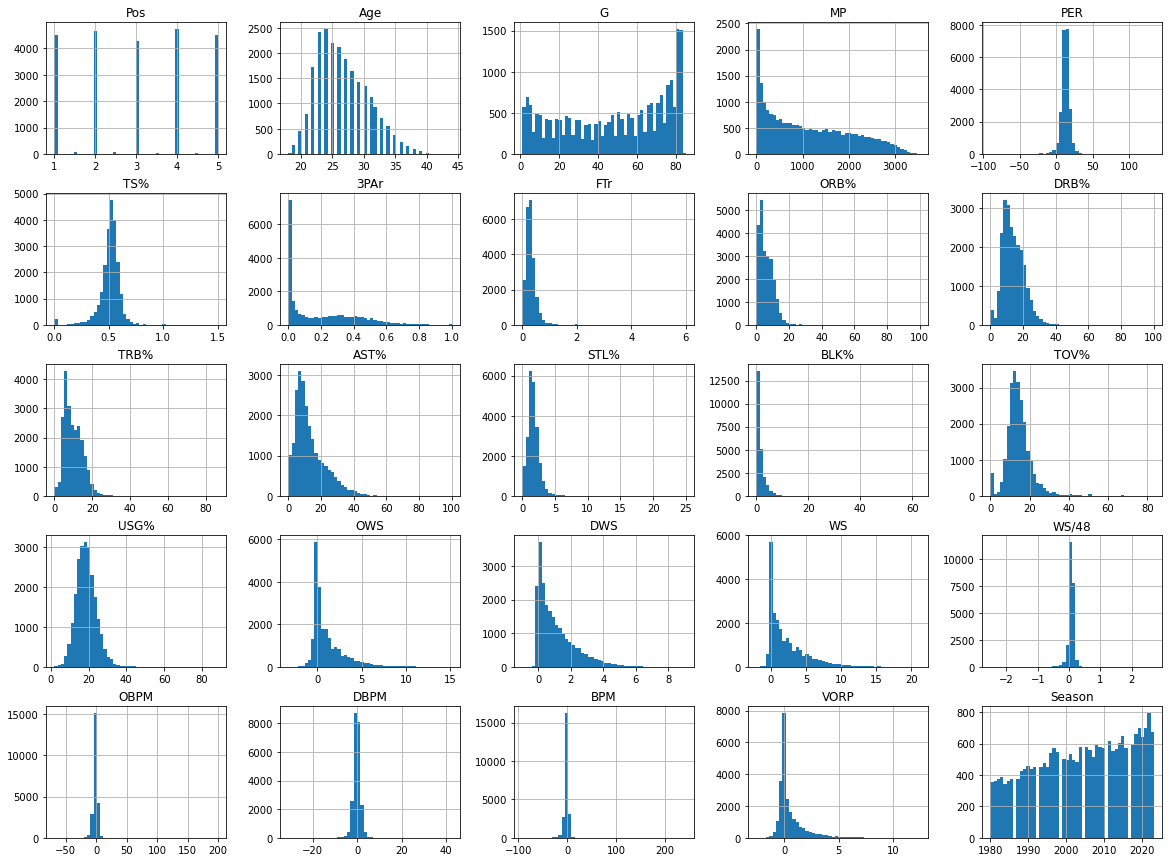

In [5]:
check_data_quality(df)

# prepairing the data 

In [6]:
first_season_df = df.groupby('Player').first().reset_index()
last_season_df = df.groupby('Player').last().reset_index()

total_seasons_df = df.groupby('Player').sum().reset_index()


לשנות לחלק מהקטגוריות לממוצעים ולא לסכום

In [7]:
first_season_df.columns = [col + '_rookie' if col != 'Player' else col for col in first_season_df.columns]
total_seasons_df.columns = [col + '_career' if col != 'Player' else col for col in total_seasons_df.columns]
df = first_season_df.merge(total_seasons_df, on='Player', how='left')

df['Duration'] = 1 + last_season_df['Season'] - first_season_df['Season_rookie']
df.drop(['Season_career', 'Age_career', 'Pos_career'], axis=1, inplace=True)

df['WS_Per_Season'] = df['WS_career'] / df['Duration']

In [8]:
df[df['Player']=='LeBron James']

,Player,Pos_rookie,Age_rookie,Tm_rookie,G_rookie,MP_rookie,PER_rookie,TS%_rookie,3PAr_rookie,FTr_rookie,ORB%_rookie,DRB%_rookie,TRB%_rookie,AST%_rookie,STL%_rookie,BLK%_rookie,TOV%_rookie,USG%_rookie,OWS_rookie,DWS_rookie,WS_rookie,WS/48_rookie,OBPM_rookie,DBPM_rookie,BPM_rookie,VORP_rookie,Season_rookie,G_career,MP_career,PER_career,TS%_career,3PAr_career,FTr_career,ORB%_career,DRB%_career,TRB%_career,AST%_career,STL%_career,BLK%_career,TOV%_career,USG%_career,OWS_career,DWS_career,WS_career,WS/48_career,OBPM_career,DBPM_career,BPM_career,VORP_career,Duration,WS_Per_Season
2059,LeBron James,2.0,19.0,CLE,79.0,3122.0,18.3,0.488,0.145,0.308,3.5,11.8,7.6,27.8,2.2,1.3,13.9,28.2,2.4,2.6,5.1,0.078,2.3,-0.6,1.7,2.9,2004,1421.0,54093.0,541.8,11.787,4.788,7.733,71.7,381.9,229.0,731.3,41.0,32.0,264.9,633.9,177.1,78.1,255.3,4.461,139.2,34.8,173.6,146.6,20,12.765


# Supervised
Exploratory data analysis

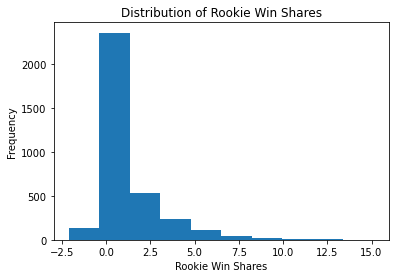

In [9]:
plt.hist(df['WS_rookie'])

# Set plot title and labels
plt.title('Distribution of Rookie Win Shares')
plt.xlabel('Rookie Win Shares')
plt.ylabel('Frequency')

# Display the plot
plt.show()

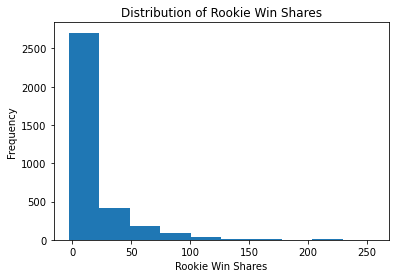

In [10]:
plt.hist(df['WS_career'])

# Set plot title and labels
plt.title('Distribution of Rookie Win Shares')
plt.xlabel('Rookie Win Shares')
plt.ylabel('Frequency')

# Display the plot
plt.show()

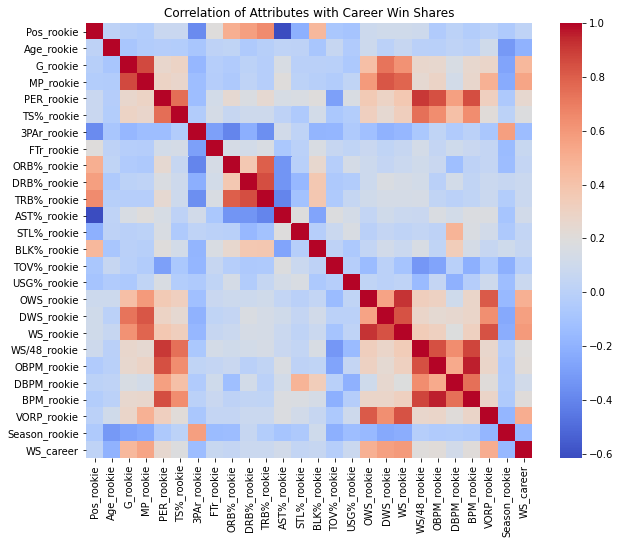

In [11]:
# Calculate the correlation matrix
correlation_matrix = df[first_season_df.columns.tolist() + ['WS_career']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Attributes with Career Win Shares')
plt.show()

# start ML

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def generate_predictions(model, X):
    predictions = model.predict(X)
    return predictions

def create_histogram(results_df):
    plt.hist(results_df['diff'], bins=50)
    plt.xlabel('Difference between Actual and Predicted')
    plt.ylabel('Frequency')
    plt.title('Histogram of Prediction')
    plt.show()

def evaluate_models(models, X, y, test_size=0.2, random_state=42):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model_name, model in models:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Generate predictions on the entire dataset
        predictions = generate_predictions(model, X)

        # Generate predictions on the test set
        y_pred_test = generate_predictions(model, X_test)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y, predictions, squared=False)
        mae = mean_absolute_error(y, predictions)
        r2 = r2_score(y, predictions)

        # Store the results in a dictionary
        result = {
            'model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2
        }
        results.append(result)

    metrics_df = pd.DataFrame(results)
    return metrics_df

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Huber Regression', HuberRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('SVR', SVR()),
    ('MLP', MLPRegressor()),
    ('Gaussian Process', GaussianProcessRegressor())
]

removed_columns = ['Season_rookie', 'Player', 'Tm_rookie']
selected_columns = first_season_df.columns[~first_season_df.columns.isin(removed_columns)]

X = df[selected_columns].values
y = df['WS_Per_Season'].values

# Call the method with your data
metrics_df = evaluate_models(models, X, y)
metrics_df

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,model,RMSE,MAE,R2 Score
0,Linear Regression,1.310325,0.914582,0.578546
1,Ridge Regression,1.308694,0.913699,0.579595
2,Lasso Regression,1.497873,1.034542,0.449267
3,ElasticNet,1.434030,0.996643,0.495213
4,Huber Regression,1.364506,0.868075,0.542973
5,Random Forest,0.753672,0.462091,0.860570
6,XGBoost,0.649700,0.286244,0.896386
7,LightGBM,0.836996,0.536713,0.828036
8,SVR,1.553317,0.966585,0.407741
9,MLP,1.336669,0.868069,0.561429


In [ ]:
import xgboost as xgb

removed_columns = ['Season_rookie', 'Player', 'Tm_rookie']
selected_columns = first_season_df.columns[~first_season_df.columns.isin(removed_columns)]

X = df[selected_columns].values
y = df['WS_Per_Season'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object and fit the model to the data
XGBoost = xgb.XGBRegressor()
XGBoost.fit(X_train, y_train)

predictions = XGBoost.predict(X)
df['WS_Prediction'] = predictions 

In [ ]:
importances = XGBoost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [18]:
df['Closest_Player'] = df.apply(lambda row: df.loc[(df['Pos_rookie'] == row['Pos_rookie']) &
                                                    (df['Player'] != row['Player']), 'WS_Per_Season']
                                                    .sub(row['WS_Prediction']).abs().idxmin(), axis=1)
# Add 'WS_Per_Season' of the closest player
df['Closest_WS_Per_Season'] = df['Closest_Player'].apply(lambda x: df.loc[x, 'WS_Per_Season'] if pd.notnull(x) else np.nan)

# Add 'Position' of the closest player
df['Closest_Position'] = df['Closest_Player'].apply(lambda x: df.loc[x, 'Pos_rookie'] if pd.notnull(x) else np.nan)

df['Closest_Player'] = df['Closest_Player'].apply(lambda x: df.loc[x, 'Player'] if pd.notnull(x) else np.nan)

In [36]:
selected_columns = ['Player', 'WS_Prediction', 'WS_Per_Season', 'Closest_Player']
selected_players = ['Luka Dončić', 'Trae Young', 'Marvin Bagley III', 'Jayson Tatum', 'LeBron James', 
                    'Michael Jordan*','Ben Simmons']

df1 = df[selected_columns].copy()
best_players = df1.loc[df1['Player'].isin(selected_players)]
best_players

,Player,WS_Prediction,WS_Per_Season,Closest_Player
242,Ben Simmons,5.416667,5.416667,Baron Davis
1528,Jayson Tatum,7.600000,7.600000,Cedric Maxwell
2059,LeBron James,12.765000,12.765000,James Harden
2121,Luka Dončić,7.875303,7.840000,Eddie Jones
2257,Marvin Bagley III,2.280000,2.280000,Shelden Williams
2331,Michael Jordan*,11.257895,11.257895,Kevin Durant
3230,Trae Young,6.620000,6.620000,Andre Miller


In [20]:
selected_players = ['Deni Avdija', 'Gal Mekel', 'Omri Casspi']

isrealis_df = df1.loc[df1['Player'].isin(selected_players)]
isrealis_df

,Player,WS_Per_Season,Closest_Player
831,Deni Avdija,1.966667,Chucky Brown
1142,Gal Mekel,-0.300000,David Burns
2528,Omri Casspi,2.010000,Josh Howard


In [32]:
df1 = df[['Player', 'WS_Per_Season','WS_Prediction']]
df1

,Player,WS_Per_Season,WS_Prediction
0,A.C. Green,6.512500,3.110980
1,A.J. Bramlett,-0.200000,-0.200000
2,A.J. English,0.550000,0.550000
3,A.J. Green,0.800000,0.800000
4,A.J. Guyton,0.100000,0.100000
...,...,...,...
3458,Šarūnas Marčiulionis*,2.512500,2.512500
3459,Žan Tabak,0.342857,0.342857
3460,Žarko Paspalj,-0.300000,-0.300000
3461,Žarko Čabarkapa,0.833333,0.246360
